<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/16_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dates

## Converting Seperate Columns into Datetime

I gathered the folloiwng dataset from [this paper](https://www.sciencedirect.com/science/article/pii/S2352340918315191).  It looks at actual hotel stays and reservations.  It is interesting because it has dates in several formats.

In [1]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/H1.csv')

df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
IsCanceled,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
LeadTime,342,737,7,13,14,14,0,9,85,75,23,35,68,18,37
ArrivalDateYear,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2,2,2,2,3,3,4,4,4,4,4
Adults,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2
Children,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [2]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

We can see nothing has been interpreted as a date yet!  Let's grab the low hanging fruit and convert the *ReservationStatusDate* into datetime.  I'll have to give it the correct format of the date.  In this case it is in the Month/Day/Year.  

In [3]:
pa.to_datetime(df.ReservationStatusDate, format='%m/%d/%Y')

0       2015-07-01
1       2015-07-01
2       2015-07-02
3       2015-07-02
4       2015-07-03
           ...    
40055   2017-09-10
40056   2017-09-10
40057   2017-09-12
40058   2017-09-14
40059   2017-09-14
Name: ReservationStatusDate, Length: 40060, dtype: datetime64[ns]

I'll add that to the dataframe converting it's current column.

In [4]:
df.ReservationStatusDate = pa.to_datetime(df.ReservationStatusDate, format='%m/%d/%Y')

If I'd like to do is get the Arrival Date into a date format.  To do that I'll first convert the month into a numeric using a dictionary.

In [5]:
df.ArrivalDateMonth.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [6]:
monthConvert = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

In [7]:
df.ArrivalDateMonth.apply(lambda s: monthConvert[s])

0        7
1        7
2        7
3        7
4        7
        ..
40055    8
40056    8
40057    8
40058    8
40059    8
Name: ArrivalDateMonth, Length: 40060, dtype: int64

In [8]:
df['ArrivalDate'] = pa.to_datetime(dict(year = df.ArrivalDateYear, month = df.ArrivalDateMonth.apply(lambda s: monthConvert[s]), day = df.ArrivalDateDayOfMonth))

df.dtypes

IsCanceled                              int64
LeadTime                                int64
ArrivalDateYear                         int64
ArrivalDateMonth                       object
ArrivalDateWeekNumber                   int64
ArrivalDateDayOfMonth                   int64
StaysInWeekendNights                    int64
StaysInWeekNights                       int64
Adults                                  int64
Children                                int64
Babies                                  int64
Meal                                   object
Country                                object
MarketSegment                          object
DistributionChannel                    object
IsRepeatedGuest                         int64
PreviousCancellations                   int64
PreviousBookingsNotCanceled             int64
ReservedRoomType                       object
AssignedRoomType                       object
BookingChanges                          int64
DepositType                       

## Date Differences

I am curious if these two dates have any differences...

In [9]:
differenceInDates =  df.ArrivalDate -df.ReservationStatusDate

differenceInDates.describe()

count                         40060
mean     18 days 01:33:23.275087369
std      54 days 20:29:21.893473870
min              -69 days +00:00:00
25%               -5 days +00:00:00
50%               -2 days +00:00:00
75%                 3 days 00:00:00
max               411 days 00:00:00
dtype: object

We see that on average people make their reservation about 18 days ahead of time and some more than a year!  Not so sure what is going on with all the negative times...

If graphed this in terms of days.  Of course there are other options found [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html#datetime-units) 

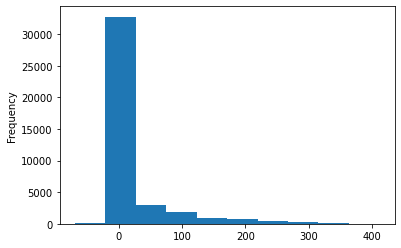

In [10]:
differenceInDates.astype('timedelta64[D]').plot(kind = 'hist')

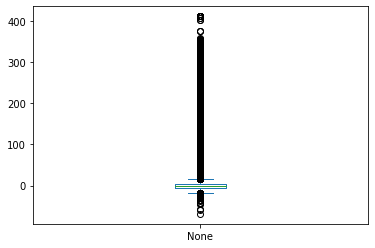

In [11]:
differenceInDates.astype('timedelta64[D]').plot.box()

## Extracting Peices

What if we wanted to get the day from the datetime?  To get it you'll need to convert it to `datetime` it is shortened to `dt` here.

In [12]:
df.ArrivalDate.dt.day

0         1
1         1
2         1
3         1
4         1
         ..
40055    31
40056    30
40057    29
40058    31
40059    31
Name: ArrivalDate, Length: 40060, dtype: int64

In [13]:
df.ArrivalDate.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0        27
1        27
2        27
3        27
4        27
         ..
40055    35
40056    35
40057    35
40058    35
40059    35
Name: ArrivalDate, Length: 40060, dtype: int64

In [14]:
df.ArrivalDate.dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
40055    2017
40056    2017
40057    2017
40058    2017
40059    2017
Name: ArrivalDate, Length: 40060, dtype: int64

In [15]:
df.ArrivalDate.dt.month

0        7
1        7
2        7
3        7
4        7
        ..
40055    8
40056    8
40057    8
40058    8
40059    8
Name: ArrivalDate, Length: 40060, dtype: int64

We could also ask what day of the week it was.

In [16]:
df.ArrivalDate.dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
40055    3
40056    2
40057    1
40058    3
40059    3
Name: ArrivalDate, Length: 40060, dtype: int64

In [17]:
df.ArrivalDate.dt.day_name()

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
40055     Thursday
40056    Wednesday
40057      Tuesday
40058     Thursday
40059     Thursday
Name: ArrivalDate, Length: 40060, dtype: object

In [18]:
df.ArrivalDate.dt.weekday

0        2
1        2
2        2
3        2
4        2
        ..
40055    3
40056    2
40057    1
40058    3
40059    3
Name: ArrivalDate, Length: 40060, dtype: int64

The weekend is 5 and 6 for Saturday and Sunday so we can ask how many were then by the following

In [19]:
df.ArrivalDate.dt.weekday[df.ArrivalDate.dt.weekday>4].count()

12009

We might wonder if that is an appropriate amount, it aappears to be about 

In [20]:
12009/40060

0.29977533699450826

In [21]:
2/7

0.2857142857142857

Yeah thos proportions look similar but we'd have to do a hypothesis test to verify it statistically.

## Numpy Can Handle Dates

Sometimes you might need to know several dates in a row.  `Numpy` can handle that with `np.arange`.

In [22]:
import numpy as np

np.arange('2018-01-01','2018-01-08', dtype='datetime64[D]')

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07'], dtype='datetime64[D]')

In [23]:
pa.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

Actually `pandas` did have a similar call and was less picky about the input style of the dates.

If you want to check for business days in a range, week days!  Use `bdate_range`.  We see the weekend was the 6th and 7th.

In [24]:
pa.bdate_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08'],
              dtype='datetime64[ns]', freq='B')

## Lag For TimeSeries Data

Sometimes our data is set in order in a time series and we are interested in knowing what came before it.  To look at this we would use the [`shift` function.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) 

In [25]:
df.StaysInWeekendNights.shift()

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40055    2.0
40056    2.0
40057    2.0
40058    4.0
40059    4.0
Name: StaysInWeekendNights, Length: 40060, dtype: float64

 We can then ask about the difference of those columns.  I'll force the first to be filled with a zero.

In [26]:
df.StaysInWeekendNights.shift(fill_value=0)-df.StaysInWeekendNights

0        0
1        0
2        0
3        0
4        0
        ..
40055    0
40056    0
40057   -2
40058    0
40059    0
Name: StaysInWeekendNights, Length: 40060, dtype: int64

This might be excellent for something like a moving average!  My example is a 5 step moveing average but that can be changed easily.

In [27]:
cols = df.StaysInWeekendNights

In [29]:
for i in range(1,5):
  cols += df.StaysInWeekendNights.shift(periods = i)

cols/5

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
40055    10.0
40056    10.0
40057    10.0
40058    10.0
40059    10.0
Name: StaysInWeekendNights, Length: 40060, dtype: float64

I had some issues making this code do what I expected so be warry!

## Selecting Dates

Some times we want to select certain dates from a dataset.  Perhaps I wanted to gather the fourth of July week from the dataset, 01-07-18 to 07-07-18.

In [32]:
df.ArrivalDate.between('01-07-15','07-07-15')

0         True
1         True
2         True
3         True
4         True
         ...  
40055    False
40056    False
40057    False
40058    False
40059    False
Name: ArrivalDate, Length: 40060, dtype: bool

Then to get at that data, we can pass the booleen values into the dataframe.

In [35]:
df[df.ArrivalDate.between('01-07-15','07-07-15')].tail(100)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate
202,0,66,2015,July,28,7,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,97.00,0,2,Check-Out,2015-07-11,2015-07-07
203,0,88,2015,July,28,7,0,4,3,0,0,HB,USA,Offline TA/TO,TA/TO,0,0,0,D,E,0,No Deposit,95,NULL,0,Transient,150.00,0,1,Check-Out,2015-07-11,2015-07-07
204,0,0,2015,July,28,7,0,4,2,0,0,BB,NLD,Direct,Direct,0,0,0,A,A,2,No Deposit,NULL,NULL,0,Transient,98.00,0,0,Check-Out,2015-07-11,2015-07-07
205,1,43,2015,July,28,7,0,5,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,134,NULL,0,Transient,91.50,0,0,Canceled,2015-05-28,2015-07-07
206,1,88,2015,July,28,7,2,5,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,NULL,0,Transient,139.00,0,2,Canceled,2015-04-13,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443,0,185,2015,July,28,6,3,8,2,0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,128,NULL,0,Contract,90.95,0,0,Check-Out,2015-07-17,2015-07-06
15447,0,184,2015,July,28,7,2,9,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,143,NULL,0,Contract,110.50,0,0,Check-Out,2015-07-18,2015-07-07
15459,0,184,2015,July,27,4,4,11,2,0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,156,NULL,0,Contract,90.95,0,0,Check-Out,2015-07-19,2015-07-04
15460,0,93,2015,July,28,5,4,10,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,243,NULL,0,Contract,88.40,0,1,Check-Out,2015-07-19,2015-07-05


The one strange thing about the `between` command is that it is inclusive so both the 1st and the 7th are included.  If times are included only exactly at midnight on the 7th is included.  You can change the inclusion with the command `inclusive` it can be `both`, `neither`, `left` or `right`.

## Your Turn

Using the dataset from an IOT device retreived from [here](https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices) and introduced to [here](https://analyticsindiamag.com/10-datasets-for-data-cleaning-practice-for-beginners/).  Uploaded to the web for you to retrieve easily here https://raw.githubusercontent.com/nurfnick/Data_Viz/main/IOT-temp.csv Answer the folloiwng questions.

1. Convert the *noted_date* into DateTime, it is in day-month-Year Hour:Minute format.
1. What is the minimum and maximum date and time?
2. What is the largest interval inbetween temperature checks?
3. What is the average datetime?
4. What was the average outside temperature on '09-11-2018'?